In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

%matplotlib widget

In [2]:
def kde2D(x, y, bandwidth, xbins=250j, ybins=250j, micro=False,**kwargs):
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    if micro == True:
        xx, yy = np.mgrid[x.min()-2.0:x.max()+2.0:xbins,
                          y.min()-2.0:y.max()+2.0:ybins]
    else:
        xx, yy = np.mgrid[x.min()-1.0:x.max()+1.0:xbins,
                          y.min()-1.0:y.max()+1.0:ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

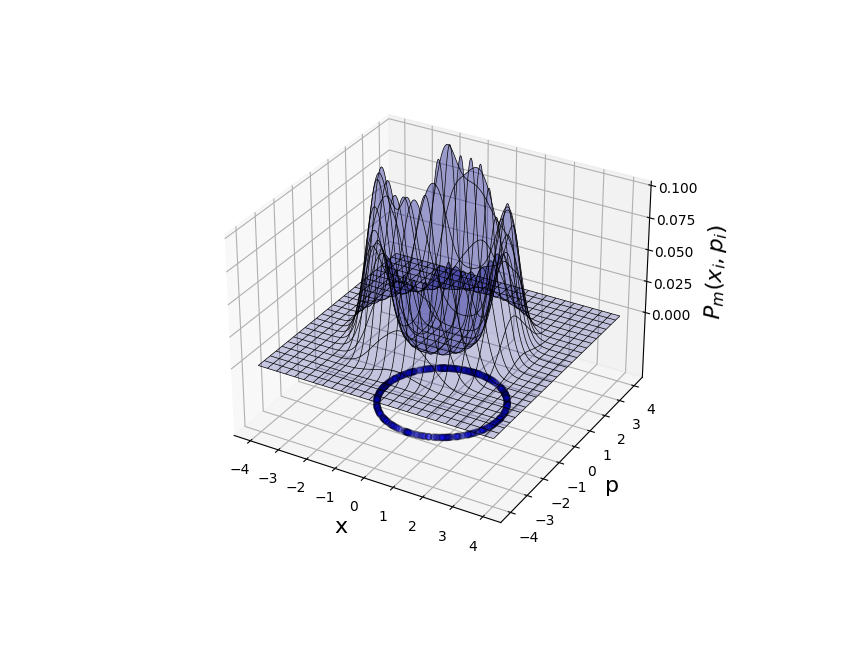

In [9]:
##MICROCANOCICAL ENSEMBLE PLOT VARIABLES
XPmicrocanonical = pd.read_csv("microcanonical_states.dat", names = ['X', 'P'])
qMC = XPmicrocanonical['X'].values[:500]
pMC = XPmicrocanonical['P'].values[:500]

X, Y, Z = kde2D(qMC, pMC, 0.35, micro=True)

fig = plt.figure(figsize = [8.5, 6.5])
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

## Plot a basic wireframe.
ax.plot_surface(X, Y, Z, rstride=10, cstride=10, alpha=0.2, linewidths=0.5, color='blue')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color='black', linewidths=0.5)

from matplotlib import cm
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.contour.html
# ax.contour(X, Y, Z, zdir='x', offset=-4.0, levels=0, colors='b', linewidths=0.8)
# ax.contour(X, Y, Z, zdir='y', offset= 4.0, levels=0, colors='b', linewidths=0.8)

offset = -0.05
ax.scatter(qMC, pMC, offset, 'ko', alpha=0.2, edgecolor='black', linewidth=1.0, color='blue')

ax.set_zlim(offset,0.025)
ax.set_zticks(np.linspace(0,0.1,5))
#ax.view_init(27, -21)
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid(True)
ax.set_xlabel(r'x', fontsize=16)
ax.set_ylabel(r'p', fontsize=16)
ax.set_zlabel(r'${P}_{m}(x_i,p_i)$', fontsize=16, labelpad=10.0)
fig.savefig('Pc.png', transparent=True, bbox_inches='tight', pad_inches=0.25)
#ax.view_init(elev=65, azim=-25)
plt.show()

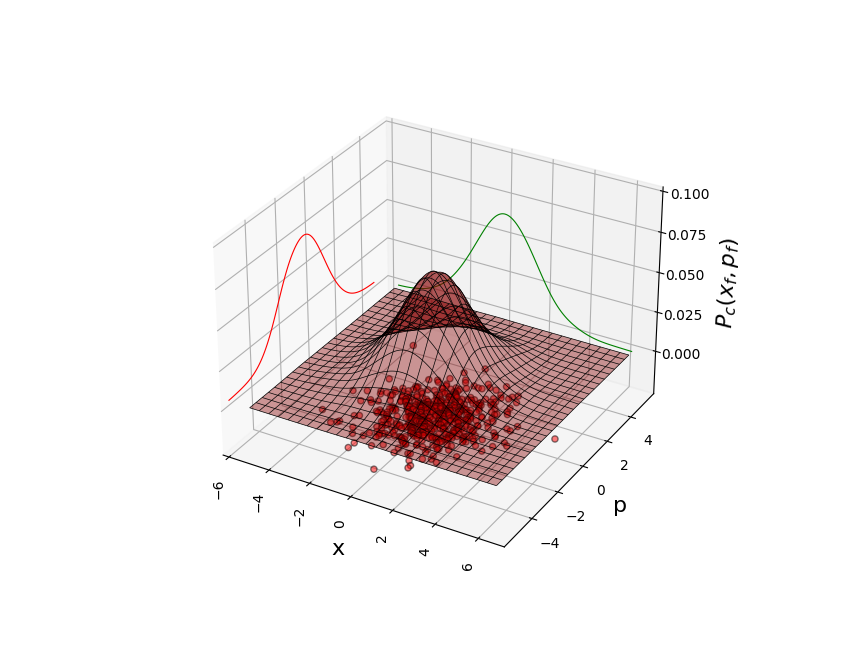

In [3]:
#CANOCICAL REPLICAS ENSEMBLE PLOT VARIABLES
XPcanonical = pd.read_csv("canonical_states.dat", names = ['X', 'P'])
qC = XPcanonical['X'].values[:500]
pC = XPcanonical['P'].values[:500]

##MICROCANOCICAL REPLICAS ENSEMBLE PLOT VARIABLES
#XPmicrocanonical = pd.read_csv("XPmicrocanonical.dat", names = ['X', 'P'])
#qMC = XPmicrocanonical['X'].values[:5000]
#pMC = XPmicrocanonical['P'].values[:5000]

X, Y, Z = kde2D(qC, pC, 0.75)

fig = plt.figure(figsize = [8.5, 6.5])
#ax  = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

## Plot a basic wireframe.
ax.plot_surface(X, Y, Z, rstride=10, cstride=10, alpha=0.4, linewidths=0.5, color= 'red')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color='black', linewidths=0.5)

from matplotlib import cm
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.contour.html
ax.contour(X, Y, Z, zdir='x', offset=-6.5, levels=0, colors='r', linewidths=0.8)
ax.contour(X, Y, Z, zdir='y', offset= 5.5, levels=0, colors='g', linewidths=0.8)

offset = -0.025
#ax.plot(qC, pC, offset, 'ko', ms=3, alpha=0.5, color='red', linewidth=1.0)
ax.scatter(qC, pC, offset, 'ko', alpha=0.5, edgecolor='black', linewidth=1.0, color='red')

ax.set_zlim(offset, 0.025)
ax.set_zticks(np.linspace(0.0, 0.1, 5))
#ax.view_init(27, -21)
plt.grid(True)
ax.set_xlabel(r'x', fontsize=16)
ax.set_ylabel(r'p', fontsize=16)
ax.set_zlabel(r'${P}_{c}(x_f,p_f)$', fontsize=16, labelpad=10.0)
fig.savefig('Pc.png', transparent=True, bbox_inches='tight', pad_inches=0.25)
plt.xticks(rotation=90)
plt.show()

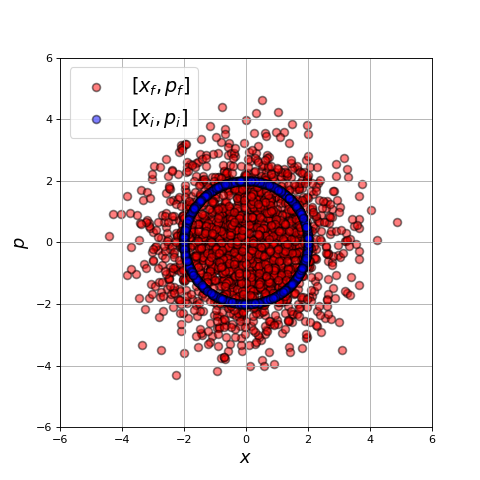

In [5]:
plt.figure(figsize=(6, 6), dpi=80)
#plt.grid(True)

#CANOCICAL REPLICAS ENSEMBLE PLOT VARIABLES
XPcanonical = pd.read_csv("canonical_states.dat", names = ['X', 'P'])
qC = XPcanonical['X'].values[500000:502000]
pC = XPcanonical['P'].values[500000:502000]

#MICROCANOCICAL REPLICAS ENSEMBLE PLOT VARIABLES
XPmicrocanonical = pd.read_csv("microcanonical_states.dat", names = ['X', 'P'])
qMC = XPmicrocanonical['X'].values[:1000]
pMC = XPmicrocanonical['P'].values[:1000]

plt.scatter( qC,  pC, s=50, alpha=0.5, edgecolor='black', linewidth =1.5, color='red',  label = r'$\left[ x_{ f },p_{ f } \right]$')
plt.scatter(qMC, pMC, s=50, alpha=0.5, edgecolor='black', linewidth =1.5, color='blue', label = r'$\left[ x_{ i },p_{ i } \right]$')

#plt.plot(qTraj, pTraj, '-0', color='black', linewidth=2.0)
#plt.title( r'$Phase Space$')

plt.ylim(-6.0, 6.0)
plt.xlim(-6.0, 6.0)

plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$p$', fontsize=16)


plt.rc('grid', linestyle="--", color='grey')
plt.grid(True)
plt.legend(fontsize = 'xx-large')

plt.savefig('CM.png')
plt.show()

# Mean Energy

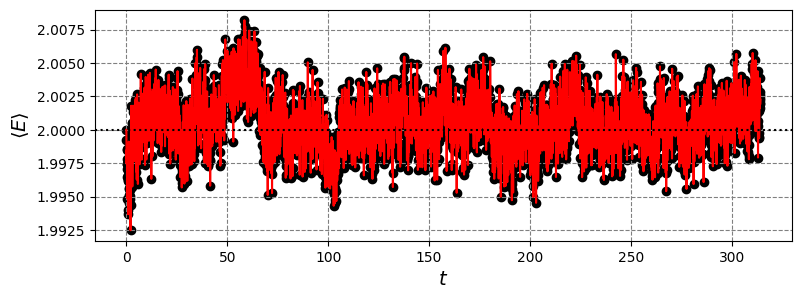

In [178]:
meanE_states = pd.read_csv("mean_energy.dat", names = ['t', 'E'])
fig, a = plt.subplots(figsize=(9, 3))
plt.plot(meanE_states.t.values, meanE_states.E.values, color="red", label="$Linear \quad Fit$")
plt.scatter(meanE_states.t.values, meanE_states.E.values, color="black")
plt.axhline(y=2.0, ls='dotted', color='black')
a.set_xlabel(r'$t$', fontsize=14)
a.set_ylabel(r'$\left< E \right> $', fontsize=14)
plt.grid(True)

# Heat exchange PDF

In [179]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm
import pandas as pd

from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

from sklearn.linear_model import LinearRegression

In [185]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def Restore_data(file_name):
    ''' Restore the information .csv file in a python list '''
    data=[]
    with open(file_name, 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            data.append(float(list(row)[0]))
        #reader = csv.reader(f)
        #restored_list = list(reader)[0]
        #data = [float(i) for i in restored_list]
        return data  

In [186]:
Q = Restore_data('TransferHeat.dat')

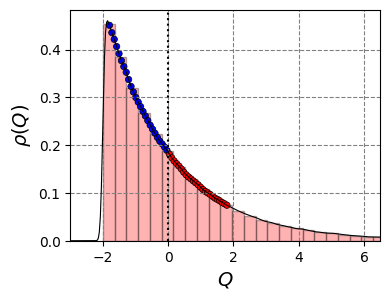

In [212]:
fig, a = plt.subplots(figsize=(4, 3))
a.hist(Q, bins=75, fc='red', alpha=0.3, color= 'r', edgecolor='black', density=True)
a.set_xlabel(r'$Q$', fontsize=14)
a.set_ylabel(r'$\rho \left( Q \right) $', fontsize=14)

DE_min, DE_max, partitions_reg = -1.8, 1.8, 50
colors = (partitions_reg//2)*['b']+(partitions_reg//2)*['r']
DE_grid_Q_reg = np.linspace(DE_min, DE_max, partitions_reg)
P_reg = kde_sklearn(np.array(Q), DE_grid_Q_reg, bandwidth=0.06)
a.scatter(DE_grid_Q_reg, P_reg, color=colors, edgecolor='black', linewidth=0.5, s=21)

DE_min, DE_max, partitions = -3.0, 6.5, 300
DE_grid_Q = np.linspace(DE_min, DE_max, partitions)
P = kde_sklearn(np.array(Q), DE_grid_Q, bandwidth=0.06)
a.plot(DE_grid_Q, P, color='black', linewidth=0.8)

plt.xlim(-3.0, 6.5)
#plt.legend(fontsize = 'large')
plt.rc('grid', linestyle="--", color='grey')
plt.axvline(x=0.0, ls='dotted', color='black') #ls='dotted'
plt.grid(True)
plt.show()

# Heat exchange Fluctuation Theorem verification

In [214]:
lim = int(partitions_reg/2)

P_neg_Q = P_reg[:lim][::-1]
P_pos_Q = P_reg[lim:]

DE_neg_grid_Q = DE_grid_Q_reg[:lim][::-1]
DE_pos_grid_Q = DE_grid_Q_reg[lim:]

log_Ps_Q = np.log(P_pos_Q/P_neg_Q)

The probability $P$ that an amount of heat $Q$ is absorbed and that an amount $-Q$ is lost are compute base on the $\rho$ PDF:

$$P \left(Q < q \leq Q+dQ\right) \approx \rho \left(Q\right)dQ \quad \quad P \left(-Q < q \leq -Q+dQ\right) \approx \rho \left(-Q\right)dQ$$

It is so that the ratio between both expressions for the probabilities is the same for the densities:

$$ \frac{P \left(Q < q \leq Q+dQ\right)}{P \left(-Q < q \leq -Q+dQ\right)} \approx \frac{\rho \left(Q\right)}{\rho \left(-Q\right)}$$

-0.9993863255074005
-0.0035338437248416676


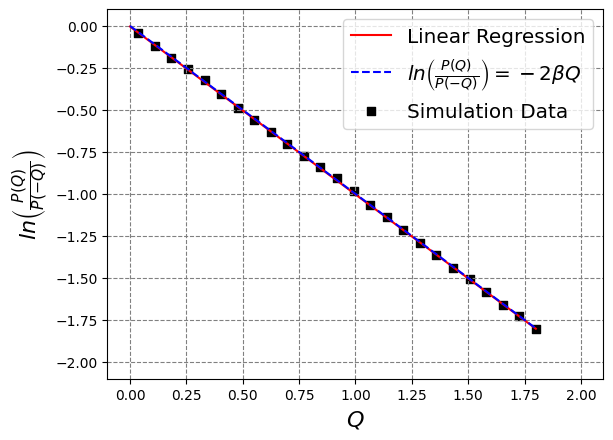

In [210]:
model = LinearRegression(fit_intercept=True)
model.fit(DE_pos_grid_Q.reshape(-1, 1), log_Ps_Q)
print(model.coef_[0]) #slope
print(model.intercept_) #intercep
m_Q = model.coef_[0]
b_Q = model.intercept_

slope = model.coef_[0]
intercept = model.intercept_

absQ=np.linspace(0, 1.8, 20)

plt.plot(absQ, slope*absQ + intercept, color="red", label=r"Linear Regression")
plt.plot(absQ, -1*absQ + 0.0, ls='dashed', color="blue", label=r'$ ln \left( \frac { P\left( Q \right)  }{ P\left( -Q \right)  }  \right) = -2 \beta Q $')
plt.scatter(DE_pos_grid_Q, log_Ps_Q, marker = "s", color="black", label=r"Simulation Data")

plt.xlim(-0.1, 2.1)
plt.ylim(-2.1, 0.1)
plt.legend(fontsize = 'x-large')
plt.ylabel(r'$ ln\left( \frac { P\left( Q \right)  }{ P\left( -Q \right)  }  \right)  $', fontsize=16)
plt.xlabel(r'$Q$', fontsize=16)
plt.grid(True)
plt.show()